### Helper Functions For Preprocessing Data

In [1]:
from helper_functions import *

### Preprocessing

Load Data

In [2]:
labels = pd.read_csv('../data/data.info.labelled')
labels.head(3)

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0


In [3]:
df = load_data_to_dataframe('../data/dataset0.json.gz')
df.head(3)

,transcript_id,position,sequence,reads
0,ENST00000000233,244,AAGACCA,"[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0..."
1,ENST00000000233,261,CAAACTG,"[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0...."
2,ENST00000000233,316,GAAACAG,"[[0.00432, 2.02, 104.0, 0.00299, 3.56, 99.3, 0..."


Assign labels to the data

In [4]:
df = combine_data(df, labels)
df.head(3)

,gene_id,transcript_id,position,sequence,reads,label
0,ENSG00000004059,ENST00000000233,244,AAGACCA,"[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0...",0
1,ENSG00000004059,ENST00000000233,261,CAAACTG,"[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0....",0
2,ENSG00000004059,ENST00000000233,316,GAAACAG,"[[0.00432, 2.02, 104.0, 0.00299, 3.56, 99.3, 0...",0


Extract mean reads

In [5]:
df = extract_mean_reads(df)
df.head(3)

,gene_id,transcript_id,position,sequence,reads,label,mean_reads
0,ENSG00000004059,ENST00000000233,244,AAGACCA,"[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0...",0,"[0.008264378378378385, 4.223783783783786, 123...."
1,ENSG00000004059,ENST00000000233,261,CAAACTG,"[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0....",0,"[0.006609244186046515, 3.2164244186046504, 109..."
2,ENSG00000004059,ENST00000000233,316,GAAACAG,"[[0.00432, 2.02, 104.0, 0.00299, 3.56, 99.3, 0...",0,"[0.0075699999999999995, 2.94054054054054, 105...."


In [6]:
# Create a temporary DataFrame by expanding the mean_reads array into separate columns
mean_read_features = pd.DataFrame(df['mean_reads'].to_list(), columns=[f'mean_read_{i+1}' for i in range(9)])

# Combine the label and signal features into a temporary DataFrame
temp_df = pd.concat([mean_read_features, df['label']], axis=1)

# Check the structure of the temporary DataFrame
print(temp_df.head())


   mean_read_1  mean_read_2  mean_read_3  mean_read_4  mean_read_5  \
0     0.008264     4.223784   123.702703     0.009373     7.382162   
1     0.006609     3.216424   109.681395     0.006813     3.226535   
2     0.007570     2.940541   105.475676     0.007416     3.642703   
3     0.010620     6.476350   129.355000     0.008632     2.899200   
4     0.010701     6.415051   117.924242     0.011479     5.870303   

   mean_read_6  mean_read_7  mean_read_8  mean_read_9  label  
0   125.913514     0.007345     4.386989    80.570270      0  
1   107.889535     0.007710     3.016599    94.290698      0  
2    98.947027     0.007555     2.087146    89.364324      0  
3    97.836500     0.006102     2.236520    89.154000      0  
4   121.954545     0.010019     4.260253    85.178788      0  


In [43]:
from scipy.stats import ttest_ind

# Loop over each `mean_read_i` feature and perform a t-test
for i in range(9):
    modified = temp_df[temp_df['label'] == 1][f'mean_read_{i+1}']
    unmodified = temp_df[temp_df['label'] == 0][f'mean_read_{i+1}']
    t_stat, p_value = ttest_ind(modified, unmodified, equal_var=False)  # Use Welch’s t-test
    print(f"mean_read_{i+1}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4e}")

mean_read_1: t-statistic = 12.20, p-value = 7.9977e-34
mean_read_2: t-statistic = 12.62, p-value = 4.4368e-36
mean_read_3: t-statistic = 51.35, p-value = 0.0000e+00
mean_read_4: t-statistic = 6.97, p-value = 3.4780e-12
mean_read_5: t-statistic = -3.85, p-value = 1.1689e-04
mean_read_6: t-statistic = 29.66, p-value = 3.4883e-181
mean_read_7: t-statistic = 13.20, p-value = 3.1522e-39
mean_read_8: t-statistic = 2.79, p-value = 5.2138e-03
mean_read_9: t-statistic = 9.65, p-value = 7.3933e-22


C:\Users\L14\AppData\Local\Temp\ipykernel_20608\1093503290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='mean_read_3', data=temp_df, palette='muted')


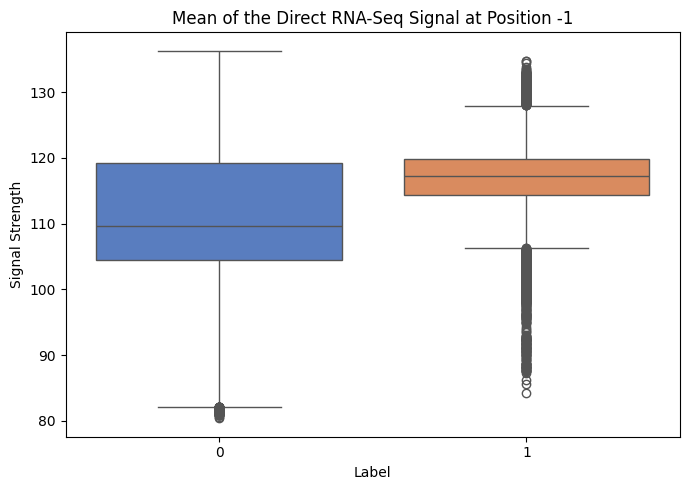

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for mean_read_3
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='mean_read_3', data=temp_df, palette='muted')
plt.title("Mean of the Direct RNA-Seq Signal at Position -1")
plt.ylabel("Signal Strength")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

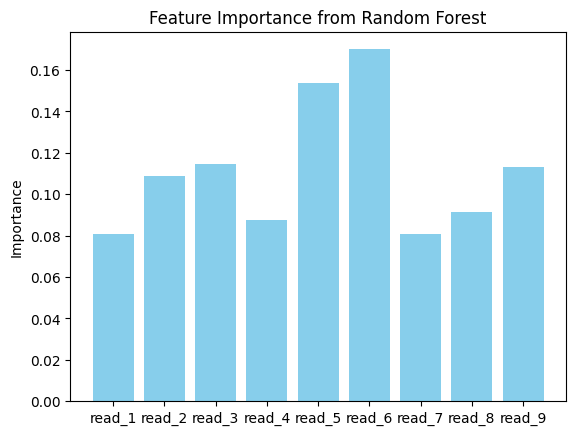

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Define features and labels
X = temp_df[[f'mean_read_{i+1}' for i in range(9)]]
y = temp_df['label']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importances
importances = model.feature_importances_
plt.bar([f'read_{i+1}' for i in range(9)], importances, color='skyblue')
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


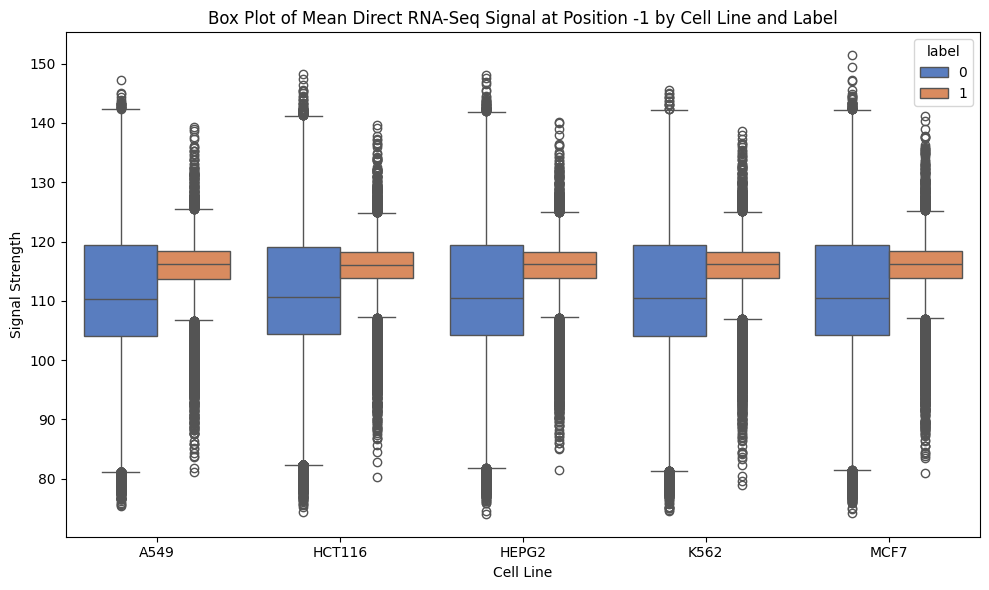

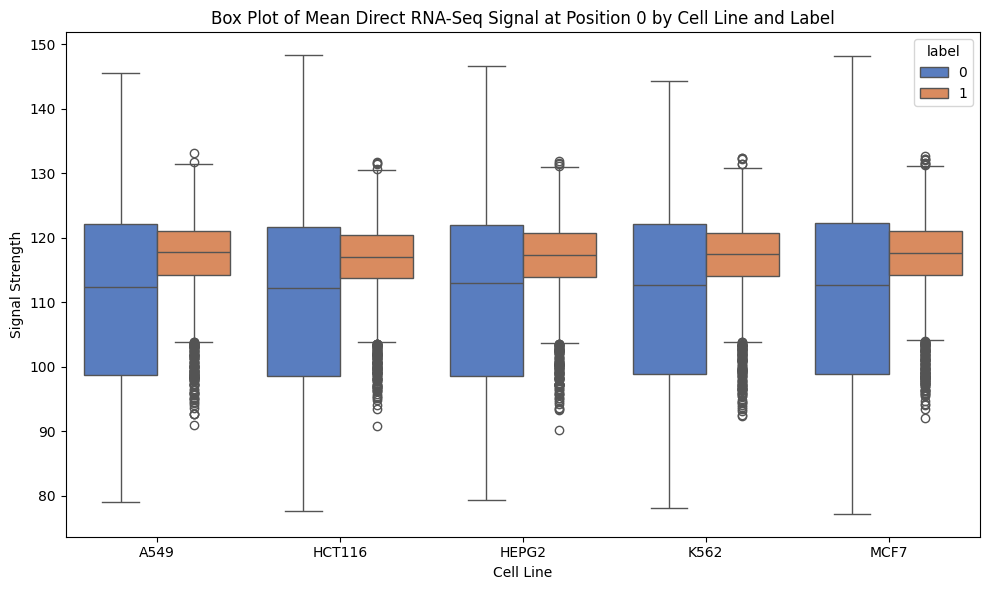

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Define the high probability threshold
# high_prob_threshold = 0.8

# # Read the temp_df CSV files into DataFrames
# a549_temp_df = pd.read_csv('../../sgnex_data/a549_temp_df.csv')
# hct116_temp_df = pd.read_csv('../../sgnex_data/hct116_temp_df.csv')
# hepg2_temp_df = pd.read_csv('../../sgnex_data/hepg2_temp_df.csv')
# k562_temp_df = pd.read_csv('../../sgnex_data/k562_temp_df.csv')
# mcf7_temp_df = pd.read_csv('../../sgnex_data/mcf7_temp_df.csv')


# a549_temp_df['cell_line'] = 'A549'
# hct116_temp_df['cell_line'] = 'HCT116'
# hepg2_temp_df['cell_line'] = 'HEPG2'
# k562_temp_df['cell_line'] = 'K562'
# mcf7_temp_df['cell_line'] = 'MCF7'

# combined_df = pd.concat([a549_temp_df, hct116_temp_df, hepg2_temp_df, k562_temp_df, mcf7_temp_df])
# combined_df.to_csv('../../sgnex_data/combined_df.csv', index=False)
# # Function to add label column based on prediction threshold
# def add_label_column(df, threshold):
#     df['label'] = df['prediction'].apply(lambda x: 1 if x > threshold else 0)
#     return df

# # Add label column to each DataFrame
# a549_temp_df = add_label_column(a549_temp_df, high_prob_threshold)
# hct116_temp_df = add_label_column(hct116_temp_df, high_prob_threshold)
# hepg2_temp_df = add_label_column(hepg2_temp_df, high_prob_threshold)
# k562_temp_df = add_label_column(k562_temp_df, high_prob_threshold)
# mcf7_temp_df = add_label_column(mcf7_temp_df, high_prob_threshold)

# # Combine all DataFrames into a single DataFrame for easier plotting
# a549_temp_df['cell_line'] = 'A549'
# hct116_temp_df['cell_line'] = 'HCT116'
# hepg2_temp_df['cell_line'] = 'HEPG2'
# k562_temp_df['cell_line'] = 'K562'
# mcf7_temp_df['cell_line'] = 'MCF7'

# combined_df = pd.concat([a549_temp_df, hct116_temp_df, hepg2_temp_df, k562_temp_df, mcf7_temp_df])
combined_df = pd.read_csv("../../sgnex_data/combined_df.csv")
# Function to add label column based on prediction threshold
def add_label_column(df, threshold):
    df['label'] = df['prediction'].apply(lambda x: 1 if x > threshold else 0)
    return df
combined_df = add_label_column(combined_df, 0.8)
# Plot box plot for mean_read_3
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_line', y='mean_read_3', hue='label', data=combined_df, palette='muted')
plt.title('Box Plot of Mean Direct RNA-Seq Signal at Position -1 by Cell Line and Label')
plt.xlabel('Cell Line')
plt.ylabel('Signal Strength')
plt.tight_layout()
plt.show()

# Plot box plot for mean_read_6
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_line', y='mean_read_6', hue='label', data=combined_df, palette='muted')
plt.title('Box Plot of Mean Direct RNA-Seq Signal at Position 0 by Cell Line and Label')
plt.xlabel('Cell Line')
plt.ylabel('Signal Strength')
plt.tight_layout()
plt.show()

In [54]:
for i in range(9):
    modified = combined_df[combined_df['label'] == 1][f'mean_read_{i+1}']
    unmodified = combined_df[combined_df['label'] == 0][f'mean_read_{i+1}']
    t_stat, p_value = ttest_ind(modified, unmodified, equal_var=False)  # Use Welch’s t-test
    print(f"mean_read_{i+1}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4e}")

mean_read_1: t-statistic = -16.48, p-value = 6.2918e-61
mean_read_2: t-statistic = -81.92, p-value = 0.0000e+00
mean_read_3: t-statistic = 214.42, p-value = 0.0000e+00
mean_read_4: t-statistic = -211.83, p-value = 0.0000e+00
mean_read_5: t-statistic = -333.62, p-value = 0.0000e+00
mean_read_6: t-statistic = 334.68, p-value = 0.0000e+00
mean_read_7: t-statistic = 2.82, p-value = 4.8398e-03
mean_read_8: t-statistic = 121.09, p-value = 0.0000e+00
mean_read_9: t-statistic = -199.87, p-value = 0.0000e+00


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the high probability threshold
high_prob_threshold = 0.8

# Read the temp_df CSV files into DataFrames
a549_temp_df = pd.read_csv('../../sgnex_data/a549_temp_df.csv')
hct116_temp_df = pd.read_csv('../../sgnex_data/hct116_temp_df.csv')
hepg2_temp_df = pd.read_csv('../../sgnex_data/hepg2_temp_df.csv')
k562_temp_df = pd.read_csv('../../sgnex_data/k562_temp_df.csv')
mcf7_temp_df = pd.read_csv('../../sgnex_data/mcf7_temp_df.csv')


a549_temp_df['cell_line'] = 'A549'
hct116_temp_df['cell_line'] = 'HCT116'
hepg2_temp_df['cell_line'] = 'HEPG2'
k562_temp_df['cell_line'] = 'K562'
mcf7_temp_df['cell_line'] = 'MCF7'

combined_df = pd.concat([a549_temp_df, hct116_temp_df, hepg2_temp_df, k562_temp_df, mcf7_temp_df])
combined_df.to_csv('../../sgnex_data/combined_df.csv', index=False)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined data
df = pd.read_csv("../data/predictions/combined_predictions.csv")

# Group by cell_line, transcript_id, and position to calculate the average prediction
df_grouped = df.groupby(['cell_line', 'transcript_id', 'position']).agg({'prediction': 'mean'}).reset_index()

# Save the grouped dataframe to a new CSV file
df_grouped.to_csv("../data/predictions/combined_predictions_grouped.csv", index=False)


C:\Users\L14\AppData\Local\Temp\ipykernel_20608\3140105721.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/predictions/combined_predictions.csv")


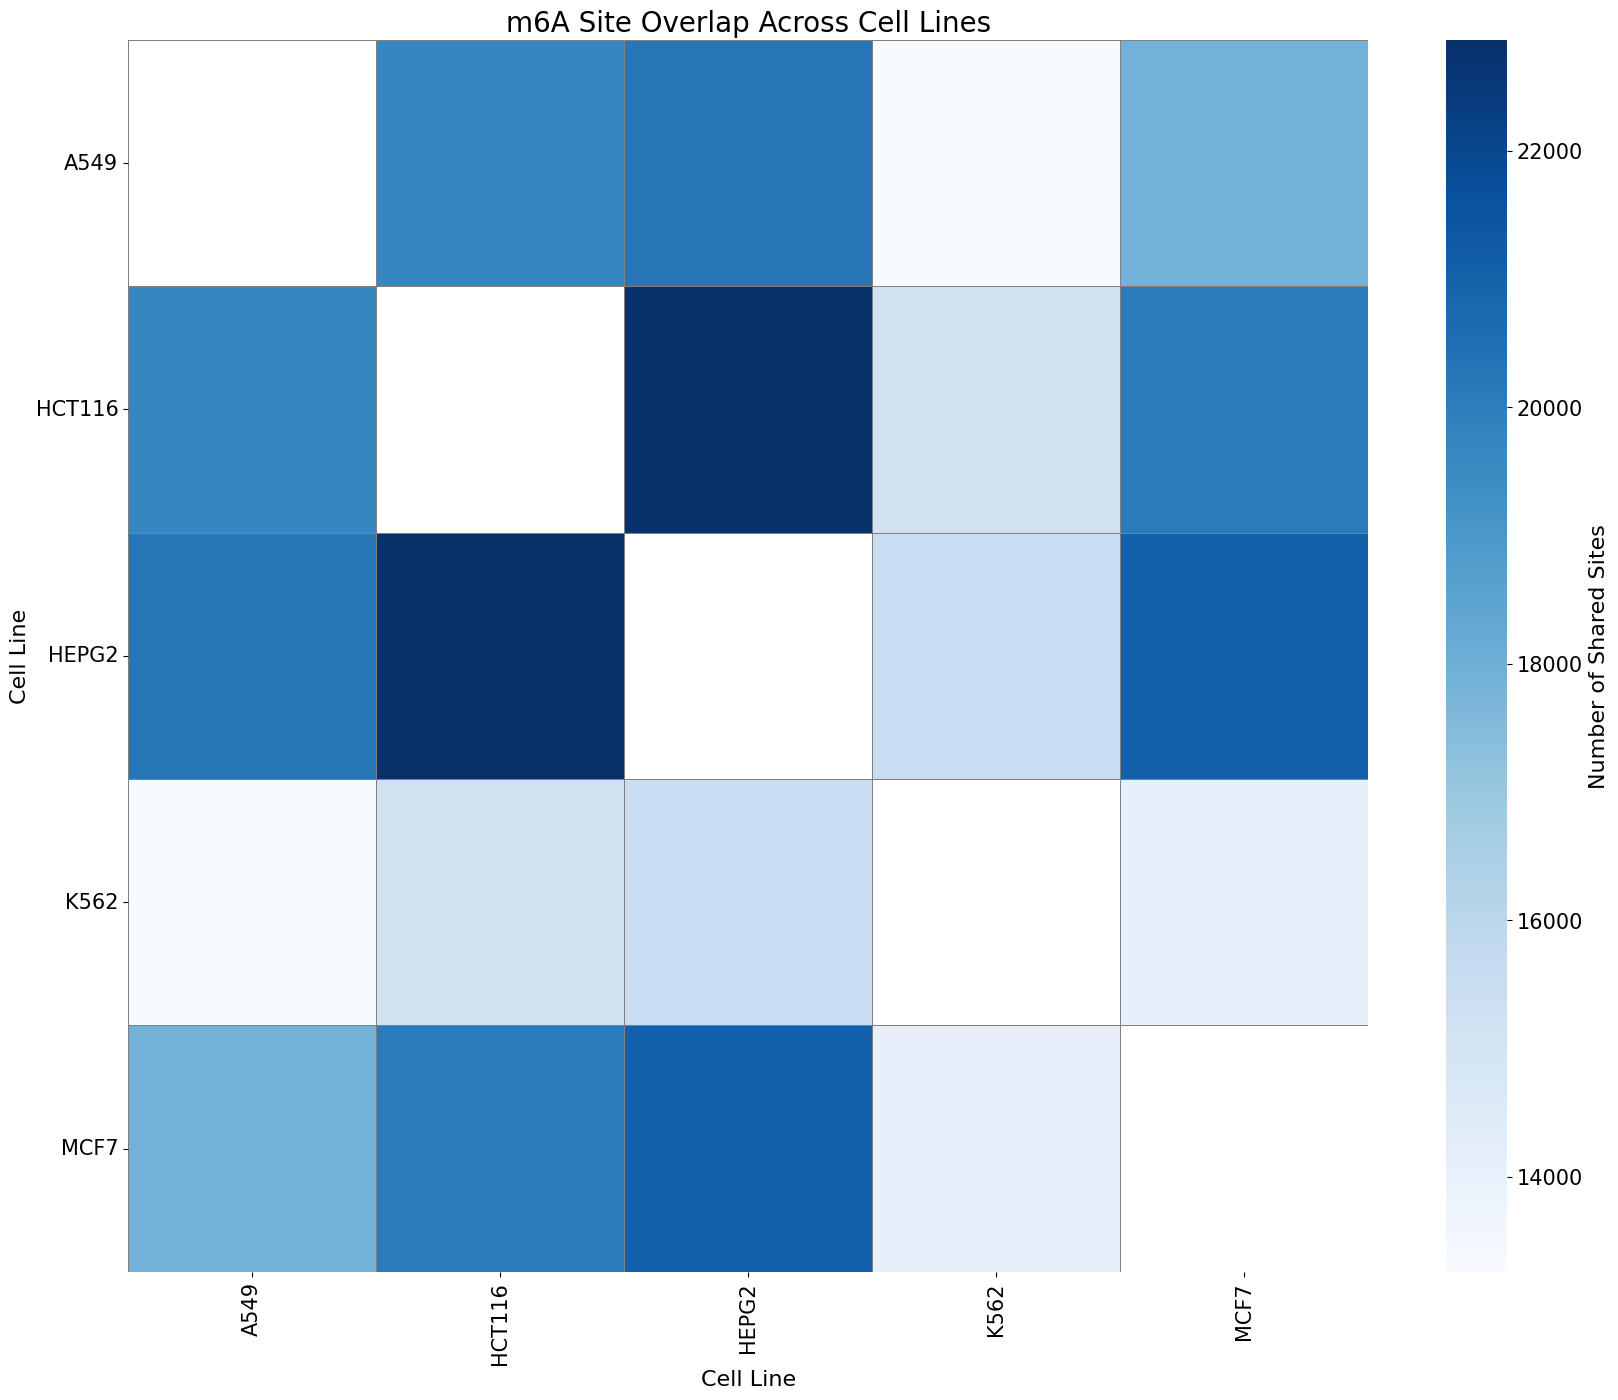

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a set of unique (transcript_id, position) pairs for each cell line
cell_line_sites = {
    cell_line: set(zip(sub_data['transcript_id'], sub_data['position']))
    for cell_line, sub_data in filtered_data.groupby('cell_line')
}

# Calculate the number of unique m6A modifications per cell line
unique_modifications_per_cell_line = {cell_line: len(sites) for cell_line, sites in cell_line_sites.items()}

# Prepare an empty DataFrame for storing the length of shared sites
cell_lines = list(cell_line_sites.keys())
overlap_matrix = pd.DataFrame(index=cell_lines, columns=cell_lines)

# Calculate the length of shared sites between each pair of cell lines
for i, cl1 in enumerate(cell_lines):
    for j, cl2 in enumerate(cell_lines):
        if i == j:
            # Set diagonal to NaN or a special value since a cell line is identical with itself
            overlap_matrix.loc[cl1, cl2] = np.nan
        else:
            # Calculate shared m6A sites
            cl1_sites = cell_line_sites[cl1]
            cl2_sites = cell_line_sites[cl2]
            shared_sites = len(cl1_sites & cl2_sites)
            
            # Store the length of shared sites in the overlap matrix
            overlap_matrix.loc[cl1, cl2] = shared_sites

# Convert the DataFrame values to numeric
overlap_matrix = overlap_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(overlap_matrix, annot=False, cmap="Blues", cbar_kws={'label': 'Number of Shared Sites'},
                      linewidths=0.5, linecolor="gray")
plt.title('m6A Site Overlap Across Cell Lines', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.xlabel('Cell Line', fontsize=16)
plt.ylabel('Cell Line', fontsize=16)

# Set the font size for the color bar label
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Number of Shared Sites', fontsize=16)

plt.show()

# Identify Conserved m6A Sites Across Cell Lines
Group the combined dataset by transcript_id and position, then check which sites have high-confidence modifications in multiple cell lines. Count the number of cell lines where the modification meets the threshold.

In [11]:
daf = pd.read_csv('../data/predictions/combined_predictions_grouped.csv')

# Set the threshold
threshold = 0.8

# Filter the data based on the threshold
high_confidence_sites = daf[daf['prediction'] >= threshold]

# Group the combined dataset by transcript_id and position
grouped_data = high_confidence_sites.groupby(['transcript_id', 'position'])

# Count the number of cell lines where the modification meets the threshold
conserved_sites = grouped_data['cell_line'].nunique().reset_index()

# Rename the columns for clarity
conserved_sites.columns = ['transcript_id', 'position', 'cell_line_count']

# Display the first few rows of the conserved sites
conserved_sites.head(3)

,transcript_id,position,cell_line_count
0,ENST00000000233,471,5
1,ENST00000000412,2440,5
2,ENST00000000412,2499,2


# Analyze Unique Modifications Per Cell Line
Identify (transcript_id, position) pairs with high-confidence modification scores in only one cell line.

C:\Users\L14\AppData\Local\Temp\ipykernel_20608\3868801195.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='cell_line', y='total_sites', palette=lighter_palette, ax=ax1, label='Total High-Confidence m6A Sites')
C:\Users\L14\AppData\Local\Temp\ipykernel_20608\3868801195.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='cell_line', y='unique_modification_count', palette=palette, ax=ax1, label='Unique m6A Modifications')


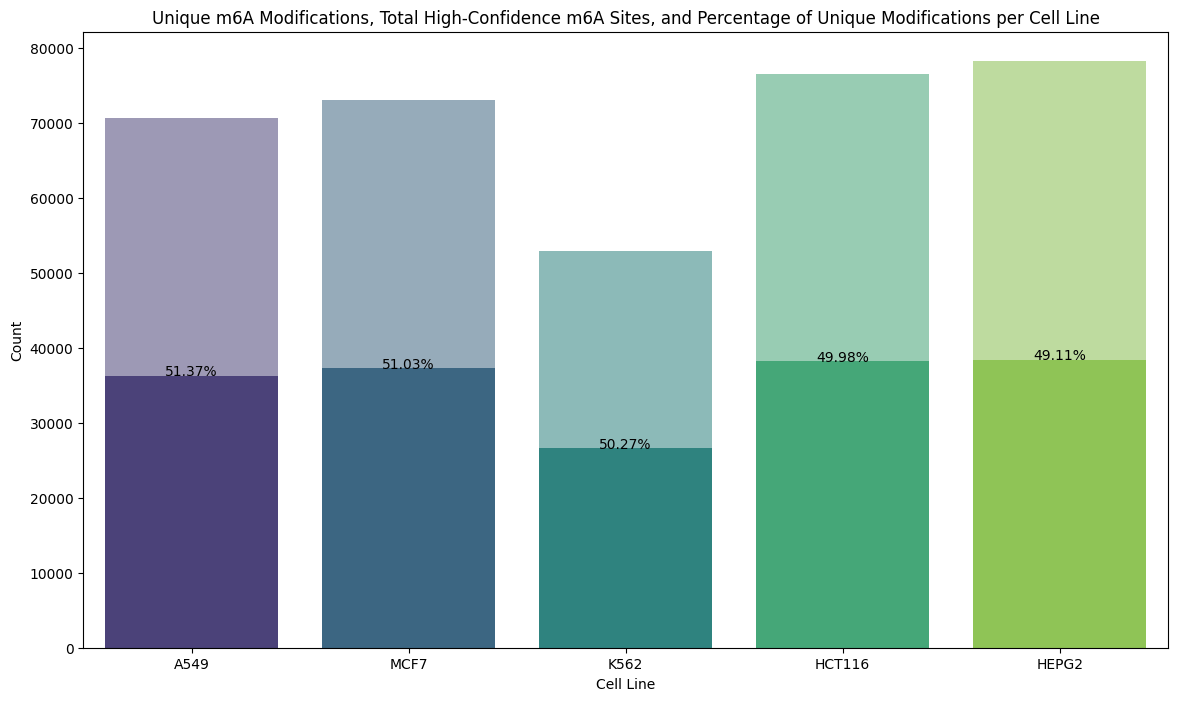

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming high_confidence_sites is already defined
# Identify (transcript_id, position) pairs with high-confidence modification scores in only one cell line
unique_sites = high_confidence_sites.groupby(['transcript_id', 'position']).filter(lambda x: len(x) == 1)

# Count the number of unique modifications per cell line
unique_modifications_per_cell_line = unique_sites['cell_line'].value_counts().reset_index()
unique_modifications_per_cell_line.columns = ['cell_line', 'unique_modification_count']

# Calculate the total number of high-confidence m6A sites for each cell line
total_sites_per_cell_line = high_confidence_sites['cell_line'].value_counts().reset_index()
total_sites_per_cell_line.columns = ['cell_line', 'total_sites']

# Merge the unique modifications and total sites dataframes
merged_df = pd.merge(unique_modifications_per_cell_line, total_sites_per_cell_line, on='cell_line')

# Calculate the percentage of unique m6A modifications
merged_df['percentage_unique'] = (merged_df['unique_modification_count'] / merged_df['total_sites']) * 100

# Sort by the percentage of unique m6A modifications
merged_df = merged_df.sort_values(by='percentage_unique', ascending=False)

# Plot the results
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define a color palette
palette = sns.color_palette("viridis", len(merged_df))

# Step 2: Generate a lighter palette for 'total_sites'
lighter_palette = [sns.light_palette(color, n_colors=3)[1] for color in palette]  # More "1" makes it lighter


# Plot the total number of high-confidence m6A sites as lighter bars
sns.barplot(data=merged_df, x='cell_line', y='total_sites', palette=lighter_palette, ax=ax1, label='Total High-Confidence m6A Sites')

# Plot the number of unique m6A modifications as darker bars
sns.barplot(data=merged_df, x='cell_line', y='unique_modification_count', palette=palette, ax=ax1, label='Unique m6A Modifications')

# Annotate the percentage values on the bars
for i in range(merged_df.shape[0]):
    ax1.text(i, merged_df['unique_modification_count'].iloc[i] + 0.5, f"{merged_df['percentage_unique'].iloc[i]:.2f}%", color='black', ha='center')

# Set the labels and title
ax1.set_xlabel('Cell Line')
ax1.set_ylabel('Count')
plt.title('Unique m6A Modifications, Total High-Confidence m6A Sites, and Percentage of Unique Modifications per Cell Line')

plt.show()

# Analyzing conserved sites across cell lines

In [42]:
import pandas as pd

# Assuming high_confidence_sites is already defined
# Identify conserved m6A sites across all cell lines
conserved_sites = high_confidence_sites.groupby(['transcript_id', 'position']).filter(lambda x: len(x) == 5)

# Identify unique m6A sites
unique_sites = high_confidence_sites.groupby(['transcript_id', 'position']).filter(lambda x: len(x) == 1)

# Calculate the total number of high-confidence m6A sites
total_sites = len(high_confidence_sites)

# Calculate the number of conserved and unique m6A sites
num_conserved_sites = len(conserved_sites)
num_unique_sites = len(unique_sites)

# Calculate the percentages
percentage_conserved = (num_conserved_sites / total_sites) * 100
percentage_unique = (num_unique_sites / total_sites) * 100

# Determine the cell line with the highest proportion of unique modifications
unique_modifications_per_cell_line = unique_sites['cell_line'].value_counts().reset_index()
unique_modifications_per_cell_line.columns = ['cell_line', 'unique_modification_count']
unique_modifications_per_cell_line['percentage_unique'] = (unique_modifications_per_cell_line['unique_modification_count'] / total_sites) * 100
print(unique_modifications_per_cell_line)
highest_unique_modifications = unique_modifications_per_cell_line.sort_values(by='percentage_unique', ascending=False).iloc[0]

# Determine the cell lines with the greatest similarity in m6A modification profiles
# Create a set of unique (transcript_id, position) pairs for each cell line
cell_line_sites = {
    cell_line: set(zip(sub_data['transcript_id'], sub_data['position']))
    for cell_line, sub_data in high_confidence_sites.groupby('cell_line')
}

# Calculate the length of shared sites between each pair of cell lines
cell_lines = list(cell_line_sites.keys())
overlap_matrix = pd.DataFrame(index=cell_lines, columns=cell_lines)

for i, cl1 in enumerate(cell_lines):
    for j, cl2 in enumerate(cell_lines):
        if i == j:
            overlap_matrix.loc[cl1, cl2] = np.nan
        else:
            cl1_sites = cell_line_sites[cl1]
            cl2_sites = cell_line_sites[cl2]
            shared_sites = len(cl1_sites & cl2_sites)
            overlap_matrix.loc[cl1, cl2] = shared_sites

# Find the pair of cell lines with the greatest similarity
most_similar_pair = overlap_matrix.stack().idxmax()

# Print the results
print(f"Out of all high-confidence m6A sites, {percentage_conserved:.2f}% were found to be conserved across all cell lines, while {percentage_unique:.2f}% were unique to individual cell lines.")
print(f"The highest proportion of unique modifications was observed in cell line {highest_unique_modifications['cell_line']}, suggesting strong cell-type-specific regulation.")
print(f"Additionally, the cell lines {most_similar_pair[0]} and {most_similar_pair[1]} showed the greatest similarity in m6A modification profiles, potentially indicating overlapping regulatory mechanisms.")

  cell_line  unique_modification_count  percentage_unique
0     HEPG2                      38452          10.939371
1    HCT116                      38243          10.879912
2      MCF7                      37295          10.610212
3      A549                      36315          10.331407
4      K562                      26597           7.566693
Out of all high-confidence m6A sites, 7.71% were found to be conserved across all cell lines, while 50.33% were unique to individual cell lines.
The highest proportion of unique modifications was observed in cell line HEPG2, suggesting strong cell-type-specific regulation.
Additionally, the cell lines HCT116 and HEPG2 showed the greatest similarity in m6A modification profiles, potentially indicating overlapping regulatory mechanisms.


In [ ]:
import pandas as pd

# Load predictions
predictions = pd.read_csv("../data/predictions/combined_predictions.csv")  # Replace with your file path

# Set threshold and filter for high-confidence m6A sites
threshold = 0.8
high_confidence_m6a = predictions[predictions['prediction'] >= threshold]

cell_line        A549     HCT116  HEPG2       K562  MCF7
transcript_id                                           
ENST00000225388  18.5  12.333333   8.75   8.000000  17.5
ENST00000258439  18.5  11.166667  10.75   8.666667  17.5
ENST00000263857  23.5  11.500000  11.00   9.666667  16.0
ENST00000283195  23.5  12.833333  12.00  11.000000  14.0
ENST00000299238  18.5  11.833333   9.50   9.666667  18.0
ENST00000300087  13.5  11.833333  10.25  15.666667  22.5
ENST00000311922  16.0  11.666667   9.75  12.333333  17.5
ENST00000318560  17.0   8.000000   9.25  16.000000  13.0
ENST00000322313  13.5  10.000000  10.50  11.333333  18.0
ENST00000328090  17.0  13.000000  13.00   8.666667  18.0
ENST00000335255  17.0  10.333333  10.50  16.333333  16.5
ENST00000362042  19.0  10.333333   9.25  12.000000  15.0
ENST00000368653  19.5  14.666667   7.50  10.000000  16.5
ENST00000374114  17.5  10.000000   9.75  13.666667  14.0
ENST00000378024  29.5  21.166667  23.50  18.666667  17.0
ENST00000394987  13.5   9.66666

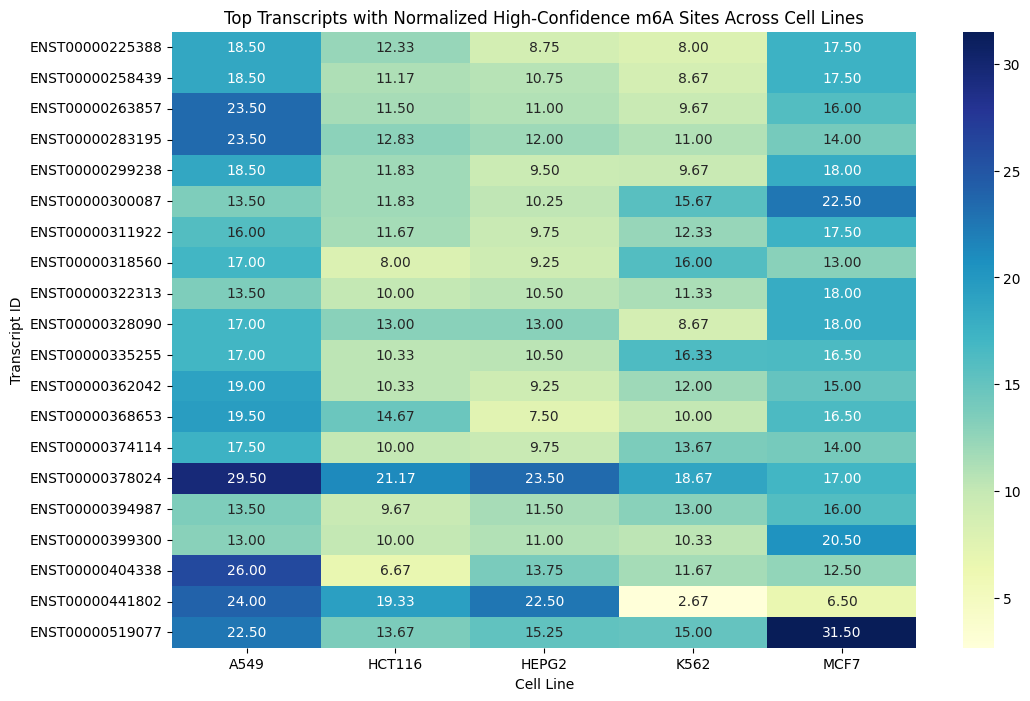

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Count the unique number of replicates and runs for each cell line
replicate_counts = high_confidence_m6a.groupby('cell_line')['replicate'].nunique()
run_counts = high_confidence_m6a.groupby('cell_line')['run'].nunique()


# Step 3: Calculate the combined normalization factor for each cell line
normalization_factors = replicate_counts * run_counts

# Step 4: Group by transcript_id and cell_line, then calculate m6A count
# Normalize by the combined replicate-run count for each cell line
normalized_counts = (
    high_confidence_m6a
    .groupby(['transcript_id', 'cell_line'])
    .size()
    .reset_index(name='m6a_count')
    .assign(normalized_m6a=lambda x: x['m6a_count'] / x['cell_line'].map(normalization_factors))
)

# Step 5: Select the top 20 transcripts with the highest normalized m6A counts
top_transcripts = (
    normalized_counts
    .groupby('transcript_id')['normalized_m6a']
    .sum()
    .nlargest(20)
    .index
)
top_transcript_data = normalized_counts[normalized_counts['transcript_id'].isin(top_transcripts)]

# Step 6: Pivot the data for plotting and fill missing values with 0 (if some cell lines have no m6A for a transcript)
heatmap_data = top_transcript_data.pivot(index='transcript_id', columns='cell_line', values='normalized_m6a').fillna(0)

print(heatmap_data)
# Step 7: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Top Transcripts with Normalized High-Confidence m6A Sites Across Cell Lines")
plt.xlabel("Cell Line")
plt.ylabel("Transcript ID")
plt.show()
